In [24]:
import subprocess
import pandas as pd
import yaml
import os
import seaborn as sns

def yaml_update_function(input_file_path, device_name, device_attribute, new_value):
    
    with open(input_file_path, 'r') as file:
        data = yaml.safe_load(file)

    for device in data:
        if device.get('device') == device_name:
            device[device_attribute] = new_value
            break

    with open(input_file_path, 'w') as file:
        yaml.dump(data, file)

#def excel_update_function

#def save_excel_outputs_to_csv(csv_data_filepath, new_value):

input_file = 'locations/Nairobi/inputs/load/devices.yaml'
device_to_change = 'battery'
device_attribute_to_change = 'load_time'
output_directory = 'sensitivity_outputs/load_time'
csv_data_filepath = 'locations/Nairobi/auto_generated/load/device_usage/battery_in_use.csv'
new_file_name = 'load_time_variation.csv'
aggregated_data_frame = pd.DataFrame()

for new_value in [1,2,3,4,5]:

    yaml_update_function(input_file, device_to_change, device_attribute_to_change, new_value)

    subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '-sim', '-pv', '5', '-b', '2','--regenerate', '--analyse'])

    # Read the CSV data into a DataFrame
    csv_data_frame = pd.read_csv(csv_data_filepath)

    # Insert the new data as a new column in the aggregated DataFrame
    aggregated_data_frame[new_value] = csv_data_frame['0']



if not os.path.exists(output_directory):
        os.makedirs(output_directory)

output_file_path = os.path.join(output_directory, new_file_name)
aggregated_data_frame.to_csv(output_file_path, index=False)






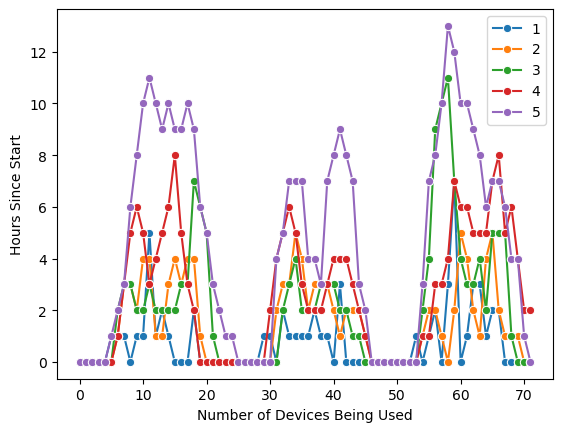

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot electricity usage over first three days
aggregated_plot = aggregated_data_frame[0:72]

for column in aggregated_plot.columns:
    sns.lineplot(data=aggregated_plot[column], marker='o', label=column)

# Add labels and legend
plt.xlabel('Number of Devices Being Used')
plt.ylabel('Hours Since Start')
plt.legend()

plt.show()

Initialisation

In [201]:
import pandas as pd
import json
import csv
import shutil
import tempfile
import os
import yaml
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar


def edit_csv(csv_file, column_name, new_value):
    # Create a temporary file to store the updated data
    temp_file = tempfile.NamedTemporaryFile(mode='w', delete=False)

    # Open the original CSV file for reading and the temporary file for writing
    with open(csv_file, 'r', newline='') as csvfile, open(temp_file.name, 'w', newline='') as temp_csvfile:
        reader = csv.DictReader(csvfile)
        fieldnames = reader.fieldnames

        writer = csv.DictWriter(temp_csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Iterate through each row and modify the specified column's value
        for row in reader:
            row[column_name] = new_value
            writer.writerow(row)

    # Close the temporary file before moving it
    temp_file.close()

    # Replace the original file with the modified temporary file
    shutil.move(temp_file.name, csv_file)

def read_json(file_path, keys):

    with open(file_path, 'r') as json_file:
        data = json.load(json_file)

        for key in keys:
            data = data.get(key)

    return data

def yaml_update_function(input_file_path, device_name, device_attribute, new_value):
    
    with open(input_file_path, 'r') as file:
        data = yaml.safe_load(file)

    for device in data:
        if device.get('device') == device_name:
            device[device_attribute] = new_value
            break

    with open(input_file_path, 'w') as file:
        yaml.dump(data, file)


def update_yaml_parameter(yaml_file_path, parameter_path, new_value):
    with open(yaml_file_path, 'r') as file:
        data = yaml.safe_load(file)

    data[parameter_path] = new_value

    with open(yaml_file_path, 'w') as file:
        yaml.dump(data, file)
        


def read_yaml(file_path, key_path):
    with open(file_path, 'r') as file:
        data = yaml.safe_load(file)

    # Traverse the nested levels to find the value
    current_level = data
    for key in key_path:
        if key in current_level:
            current_level = current_level[key]
        else:
            return None  # Key not found

    return current_level


def calculate_discount_factor(discount_rate, num_years):
    discount_factors = []
    for year in range(1, num_years + 1):
        discount_factor = (1 + discount_rate) ** (-year)
        discount_factors.append(discount_factor)
    return discount_factors



def calculate_discounted_revenue(swap_price, yearly_swaps, discount_fraction):
    yearly_revenue = swap_price * yearly_swaps

    discounted_revenue_yearly = discount_fraction * yearly_revenue

    total_discounted_revenue = discounted_revenue_yearly.sum()

    return total_discounted_revenue


def find_positive_NPV_price(total_discounted_cost, yearly_swaps, discount_fraction):

    def find_NPV(price):
        return calculate_discounted_revenue(price, yearly_swaps, discount_fraction) - total_discounted_cost

    result = root_scalar(find_NPV, bracket=[0, 10])

    if result.converged:
        return result.root
    else:
        return None


def save_df_to_csv(output_directory, df_to_save):
        file_location = os.path.join(output_directory, f"{df_to_save}.csv")
        fuel_cost_dataframe.to_csv(file_location, index=False)


In [199]:
scenario_name = 'default'
scenario_input_file = 'locations/Nairobi/inputs/scenario/scenario_inputs.yaml'
solar_key = 'pv'
grid_key = 'grid'
bess_key = 'battery'
solar = 'false'
update_yaml_parameter(scenario_input_file, 'scenarios.name', solar)


In [ ]:
#scenario_input_file = 'locations/Nairobi/inputs/scenario/scenario_inputs.yaml
#solar_key = 'pv'
#grid_key = 'grid'
#bess_key = 'battery'

for grid, solar, BESS in zip([true,true, true, false], [false,true,true, true], [false, false, true, true])

    generic_yaml_update_function(input_file, grid_key, grid)
    generic_yaml_update_function(input_file, grid_key, grid)
    

Scenario 3: GRID, PV and BESS
All results in this section are conducted using all available technology

Standard Results



In [204]:
subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '--optimisation', '--output', 'Scenario3_Standard_Inputs', '--regenerate',])

1

In [203]:


total_cost_key = ['system_appraisals','iteration_0','financial_appraisal', 'total_cost']
cumulative_emissions_key = ['system_appraisals','iteration_0','cumulative_results', 'cumulative_ghgs']
lcue_key = ['system_appraisals','iteration_0','criteria', 'lcue']

file_name = 'optimisation_output_1.json'

optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs/Scenario3_Standard_Inputs'
    
optimisation_output_filepath = os.path.join(optimisation_output_directory, file_name)

Scenario_3_Standard_config_outputs = pd.DataFrame()

lcue_output = read_json(optimisation_output_filepath, lcue_key)
cumulative_emissions_output = read_json(optimisation_output_filepath, cumulative_emissions_key)
total_cost_output = read_json(optimisation_output_filepath, total_cost_key)

Scenario_3_Standard_config_outputs['lcue'] = lcue_output
Scenario_3_Standard_config_outputs['cum_emissions'] = cumulative_emissions_output
Scenario_3_Standard_config_outputs['total_cost'] = total_cost_output

save_df_to_csv(optimisation_output_directory, Scenario_3_Standard_config_outputs)


FileNotFoundError: [Errno 2] No such file or directory: 'locations/Nairobi/outputs/optimisation_outputs/Scenario3_Standard_Inputs\\optimisation_output_1.json'

Grid Price Sensitivity

In [54]:

excel_file = "locations/Nairobi/inputs/generation/default_grid_attributes.csv"
sheet_name = 'default_grid_attributes'
column_name = 'price'
output_directory = 'sensitivity_outputs/grid_price'



for new_value in [0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21]:

    edit_excel(excel_file, column_name, new_value)

    subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '--optimisation', '--output', f'Scenario3_grid_price_sensitivity_{new_value}'])


    



In [2]:




output_metric =[]
for new_value in [0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21]:

    file_name = f'grid_price_sensitivity_{new_value}/optimisation_output_1.json'
    
    optimisation_output_filepath = os.path.join(optimisation_output_directory, file_name)
    
    output = read_json(optimisation_output_filepath, key)

    output_metric.append(output)

grid_price_sensitivity_metric = pd.Series(output_metric)

Charge rate sensitivity

In [4]:

input_file = 'locations/Nairobi/inputs/load/devices.yaml'
device_to_change = 'battery'
change_load_time = 'load_time'
change_charge_power = 'electric_power'
output_directory = 'sensitivity_outputs/load_time'
csv_data_filepath = 'locations/Nairobi/auto_generated/load/device_usage/battery_in_use.csv'
new_file_name = 'load_time_variation.csv'

for charge_power, charging_time in zip([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], [5.92, 2.96, 1.97, 1.48,1.184, 0.99, 0.85, 0.74]):

    yaml_update_function(input_file, device_to_change, change_load_time, charging_time)
    yaml_update_function(input_file, device_to_change, change_charge_power, charge_power )

    subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '--optimisation', '--output', f'charging_power_sensitivity_{charge_power}', '--regenerate'])

In [5]:
import os
import json
import pandas as pd


optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs'

key = ['system_appraisals','iteration_0','criteria', 'lcue']

output_metric =[]
for new_value in [500,1000,1500,2000,3000, 3500,4000]:

    file_name = f'charging_power_sensitivity_{new_value}/optimisation_output_1.json'
    
    optimisation_output_filepath = os.path.join(optimisation_output_directory, file_name)
    
    output = read_json(optimisation_output_filepath, key)

    output_metric.append(output)

charging_power_sensitivity_metric = pd.Series(output_metric)

Electricity availability sensitivity

In [2]:
import pandas as pd
import json
import csv
import shutil
import tempfile
import subprocess



csv_file = "locations/Nairobi/inputs/generation/grid_times.csv"
column_name = 'default'
output_directory = 'sensitivity_outputs/grid_price'
optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs'
key = ['system_appraisals','iteration_0','criteria', 'lcue']

for new_value in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]:

    edit_excel(csv_file, column_name, new_value)

    subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '--optimisation', '--output', f'grid_availability_sensitivity_{new_value}', '--regenerate'])

KeyboardInterrupt: 

In [ ]:
import os
import json
import pandas as pd


optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs'


key = ['system_appraisals','iteration_0','criteria', 'lcue']

output_metric =[]
for new_value in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]:

    file_name = f'grid_availability_sensitivity_{new_value}/optimisation_output_1.json'
    
    optimisation_output_filepath = os.path.join(optimisation_output_directory, file_name)
    
    output = read_json(optimisation_output_filepath, key)

    output_metric.append(output)

grid_availability_sensitivity_metric = pd.Series(output_metric)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


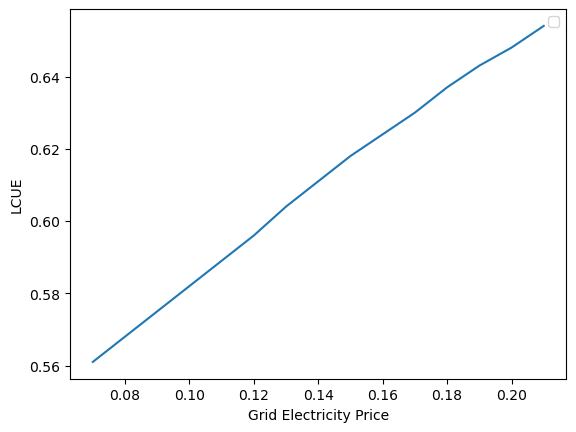

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=output_metric, x = [0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21], y= output_metric.values)

# Add labels and legend
plt.xlabel('Grid Electricity Price')
plt.ylabel('LCUE')
plt.legend()

plt.show()

Calculate economic implications, swap price required for 0 NPV, 10% IRR and lifetime equity with existing boda bodas

In [1]:

import subprocess
import os
import pandas as pd

optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs'
file_name = 'Scenario_3_Optimum_default_config'

subprocess.call(['python', '-m', 'src.clover', '-l' ,'Nairobi', '--optimisation', '--output', 'Scenario_3_Optimum_default_config'])



C:\Users\Harry\AppData\Local\Temp\ipykernel_19732\3554176744.py:13: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  number_of_swaps = pd.read_csv(number_of_swaps_filepath, header=None, squeeze=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.6112025634775033
-6606.461375563464


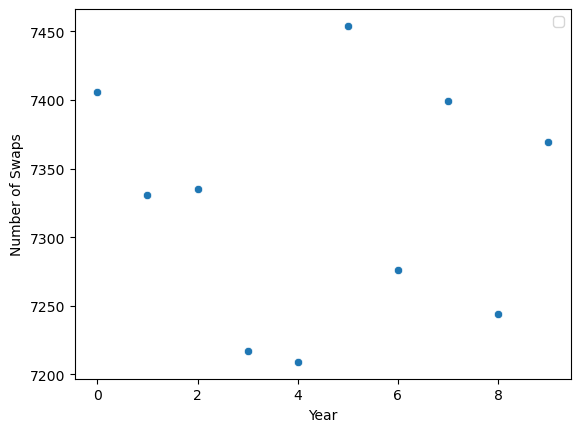

In [35]:

#Select optimisation file that you want to analyse
optimisation_output_directory = 'locations/Nairobi/outputs/optimisation_outputs'
file_name = 'Scenario_3_Optimum_default_config'

cum_grid_cost_key = ['system_appraisals','iteration_0','financial_appraisal', 'grid_cost']
cum_diesel_cost_key = ['system_appraisals','iteration_0','financial_appraisal', 'diesel_cost']
total_discounted_cost_key = ['system_appraisals','iteration_0','financial_appraisal', 'total_cost']

optimisation_output_filepath = os.path.join(optimisation_output_directory, file_name, 'optimisation_output_1.json')

number_of_swaps_filepath = 'locations/Nairobi/auto_generated/load/device_usage/battery_switched_on.csv'

number_of_swaps = pd.read_csv(number_of_swaps_filepath, header=None, squeeze=True)

yearly_swaps = number_of_swaps.groupby(number_of_swaps.index//8760).sum()

# = []

#economic_analysis_df.append(yearly_swaps)

#swap_price = 2.65

#Extract fixed CAPEX
fixed_CAPEX = read_yaml('locations/Nairobi/inputs/impact/finance_inputs.yaml', ['misc', 'fixed_cost'])

fixed_OPEX = read_yaml('locations/Nairobi/inputs/impact/finance_inputs.yaml', ['misc', 'general_o&m'])


total_discounted_cost = read_json(optimisation_output_filepath, total_discounted_cost_key) 

discount_rate = 0.107

years = 10

discount_fraction = calculate_discount_factor(discount_rate, years)

break_even_price = find_no_NPV_price(total_discounted_cost, yearly_swaps, discount_fraction)

price_for_cost_parity = 2.46

NPV_at_cost_parity = calculate_discounted_revenue(price_for_cost_parity, yearly_swaps, discount_fraction) - total_discounted_cost

print(break_even_price)
print(NPV_at_cost_parity)
sns.scatterplot(x =yearly_swaps.index, y = yearly_swaps.values, data = yearly_swaps)

plt.xlabel('Year')
plt.ylabel('Number of Swaps')
plt.legend()

plt.show()